In [2]:
import pandas as pd
import numpy as np

In [3]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

In [4]:
df = pd.read_csv(file_url)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [10]:
df_cleaned = df.copy()

In [11]:
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [14]:
X_train_cleaned = X_train.copy()

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
num_cols = X_train_cleaned.select_dtypes([np.number]).columns
num_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
sc = StandardScaler()

In [18]:
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [19]:
cat_cols = ['Gender']

In [20]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [21]:
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

In [22]:
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,0.0,1.771416,-0.844380,-0.585705
4,0.0,-0.583546,-1.674190,-0.388498
196,0.0,0.386144,2.632916,-0.861795
111,0.0,-1.414709,0.143488,0.163682
141,1.0,-0.514282,0.617665,1.701898
...,...,...,...,...
136,0.0,0.316881,0.538635,-1.690066
133,0.0,-0.583546,0.499120,0.834186
105,0.0,-1.276181,0.103973,-0.309615
84,0.0,-1.276181,-0.212145,0.282006


In [23]:
X_train_cleaned.reset_index(drop=True, inplace=True)

In [24]:
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.771416,-0.844380,-0.585705
1,0.0,-0.583546,-1.674190,-0.388498
2,0.0,0.386144,2.632916,-0.861795
3,0.0,-1.414709,0.143488,0.163682
4,1.0,-0.514282,0.617665,1.701898
...,...,...,...,...
155,0.0,0.316881,0.538635,-1.690066
156,0.0,-0.583546,0.499120,0.834186
157,0.0,-1.276181,0.103973,-0.309615
158,0.0,-1.276181,-0.212145,0.282006


In [25]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

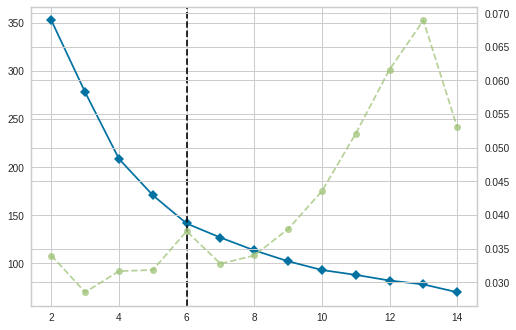

In [39]:
model = KElbowVisualizer(KMeans(), k=(2,15),locate_elbow=True).fit(X_train_cleaned)

In [29]:
n_clusters = model.elbow_value_

In [30]:
from sklearn.mixture import GaussianMixture

In [31]:
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [32]:
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
gmm.predict(X_train_cleaned)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [34]:
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

In [35]:
obs

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.771416,-0.84438,-0.585705


In [36]:
gmm.predict(obs)

array([2])

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [43]:
cat_transformer = Pipeline(steps=[('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))])

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ])

In [46]:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [47]:
gmm_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_cols',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')),
                                                 ('ca

In [48]:
gmm_pipe.predict(X_train)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [49]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

In [50]:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')

['../models/gmm_pipeline.joblib']